## Project 11 Кривоногов Н.В. (hemerahu)

# Задания

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import scipy.stats as st

from statsmodels.stats.proportion import proportion_confint

from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings('ignore')

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

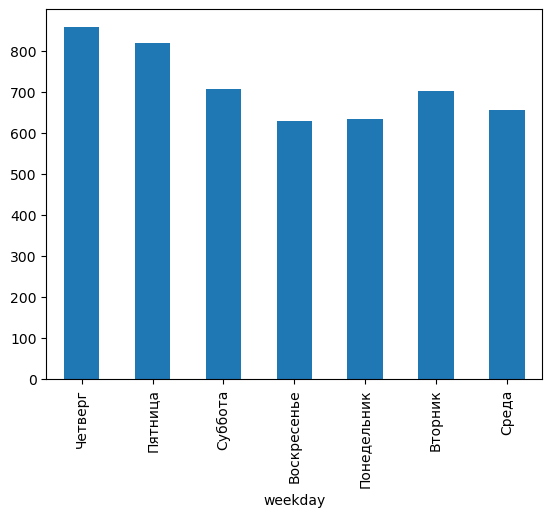

In [2]:
## Код тут

df = pd.read_csv('..\datasets\pizza.csv', sep=';')

df['weekday'] = pd.to_datetime(df['lead_time']).dt.day_name(locale='Russian')

nice_bar_plot = df['weekday'].groupby(df['weekday'], sort=False).count().plot(kind="bar")

plt.show()

In [3]:
print(f"Больше всего продано пиццы в {df['weekday'].value_counts().index[0]}, "
      f"меньше всего в {df['weekday'].value_counts().index[-1]}.")

Больше всего продано пиццы в Четверг, меньше всего в Воскресенье.


### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [4]:
## Код тут

df['order_dt'] = np.nan

for i in range(df.shape[0]):    
    df['order_dt'].iloc[i] = df['order_date'][i].split()[0] + ' ' + df['order_time'][i]
    
df['cook_time'] = (pd.to_datetime(df['lead_time']) - pd.to_datetime(df['order_dt'])).astype('timedelta64[s]')

df.head()

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time,weekday,order_dt,cook_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30,Четверг,2015-01-01 11:38:36,894.0
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26,Четверг,2015-01-01 11:57:40,1126.0
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19,Четверг,2015-01-01 11:57:40,1119.0
3,4,2,ital_supr_l,2015-01-01 00:00:00,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58,Четверг,2015-01-01 11:57:40,798.0
4,5,2,mexicana_m,2015-01-01 00:00:00,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24,Четверг,2015-01-01 11:57:40,1004.0


In [5]:
print(f"Среднее время приготовления пиццы: {round(df['cook_time'].mean())}.")
print(f"Медианное время приготовления пиццы: {round(df['cook_time'].median())}.")
print(f"Максимальное время приготовления пиццы: {round(df['cook_time'].max())}.")
print(f"Минимальное время приготовления пиццы: {round(df['cook_time'].min())}.")

Среднее время приготовления пиццы: 1007.
Медианное время приготовления пиццы: 1006.
Максимальное время приготовления пиццы: 1609.
Минимальное время приготовления пиццы: 444.


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [6]:
data = df['cook_time']

conf_int = st.norm.interval(alpha=0.95,
                            loc=np.mean(data),
                            scale = np.std(data, ddof=1) / np.sqrt(len(data)))

print(f'95% доверительный интервал для среднего времени приготовления пиццы: ({round(conf_int[0])}, {round(conf_int[1])}).')

95% доверительный интервал для среднего времени приготовления пиццы: (1002, 1012).


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [7]:
## Код тут

df_conf_int = df.groupby('pizza_name')['cook_time'].agg(['count', 'mean', 'std'])

df_conf_int = df_conf_int[df_conf_int['count'] > 100]

df_conf_int['conf_int_low'], df_conf_int['conf_int_upp'] = st.norm.interval(alpha=0.95,
                                                                    loc = df_conf_int['mean'],
                                                                    scale = df_conf_int['std'] / np.sqrt(df_conf_int['count']))

print(f"Пицца, у которой верхняя граница доверительного интервала её изготовления самая высокая: "
      f"{df_conf_int['conf_int_upp'].sort_values(ascending=False).index[0]}.")

Пицца, у которой верхняя граница доверительного интервала её изготовления самая высокая: The Italian Vegetables Pizza.


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [8]:
## Код тут

df_conf_int['conf_int_diff'] = df_conf_int['conf_int_upp'] - df_conf_int['conf_int_low']

print(f"Пицца с самым широким доверительным интервалом: {df_conf_int['conf_int_diff'].sort_values(ascending=False).index[0]}.")

Пицца с самым широким доверительным интервалом: The Chicken Alfredo Pizza.


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

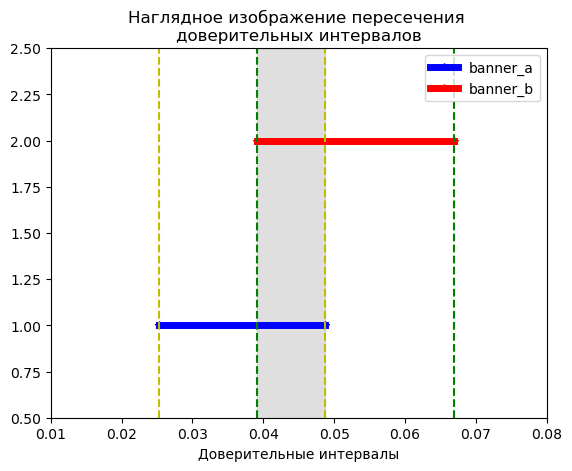

In [9]:
## Код тут

df_stat = pd.read_csv('..\datasets\click.csv')

conf_int_a = proportion_confint(count = df_stat['banner_a'].sum(),
                                nobs = len(df_stat['banner_a']),
                                alpha=0.05,
                                method='normal')

conf_int_b = proportion_confint(count = df_stat['banner_b'].sum(),
                                nobs = len(df_stat['banner_b']),
                                alpha=0.05,
                                method='normal')

x1, y1 = [conf_int_a[0], conf_int_a[1]], [1, 1]
x2, y2 = [conf_int_b[0], conf_int_b[1]], [2, 2]
plt.plot(x1, y1, label = 'banner_a', lw = 5, color = 'b', marker = '*')
plt.plot(x2, y2, label = 'banner_b', lw = 5, color = 'r', marker = '*')

plt.vlines([conf_int_a[0], conf_int_a[1]], 0.5, 2.5, color = 'y', linestyles = "dashed")
plt.vlines([conf_int_b[0], conf_int_b[1]], 0.5, 2.5, color = 'g', linestyles = "dashed")

plt.axvspan(conf_int_b[0], conf_int_a[1], color = 'grey', alpha = 0.25)

plt.xlim([0.01, 0.08])
plt.ylim([0.5, 2.5])
plt.legend()
plt.title('Наглядное изображение пересечения \nдоверительных интервалов')
plt.xlabel('Доверительные интервалы')

plt.show()

Как видно из графика, эти интервалы пересекаются.

### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [10]:
n_a = len(df_stat['banner_a'])
n_b = len(df_stat['banner_b'])
n_like_a = df_stat['banner_a'].sum()
n_like_b = df_stat['banner_b'].sum()
p_a = n_like_a / n_a
p_b = n_like_b / n_b
z = st.norm.ppf(1 - 0.05 / 2)

left_boarder = round(p_a - p_b - z * np.sqrt((p_a * (1 - p_a) / n_a) + (p_b * (1 - p_b) / n_b)), 5)
right_boarder = round(p_a - p_b + z * np.sqrt((p_a * (1 - p_a) / n_a) + (p_b * (1 - p_b) / n_b)), 5)

print(f'95% доверительный интервал для разности двух долей: {list([left_boarder , right_boarder])}.')

95% доверительный интервал для разности двух долей: [-0.03416, 0.00216].


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [11]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [12]:
## Код тут

z_score = z_stat(df_stat['banner_a'], df_stat['banner_b'])

p_value = round(st.norm.sf(abs(z_score)), 5)

print(f'Если р-значение, равное в нашем случае {p_value}, ниже заданного уровня значимости, а alpha у нас равна 0.05, '
      'то нулевая гипотеза (H0 - Старый баннер нравится больше) отвергается. Следовательно верна альтернативная гипотеза H1: '
      'новый баннер больше нравится пользователям.')

Если р-значение, равное в нашем случае 0.04219, ниже заданного уровня значимости, а alpha у нас равна 0.05, то нулевая гипотеза (H0 - Старый баннер нравится больше) отвергается. Следовательно верна альтернативная гипотеза H1: новый баннер больше нравится пользователям.


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [13]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

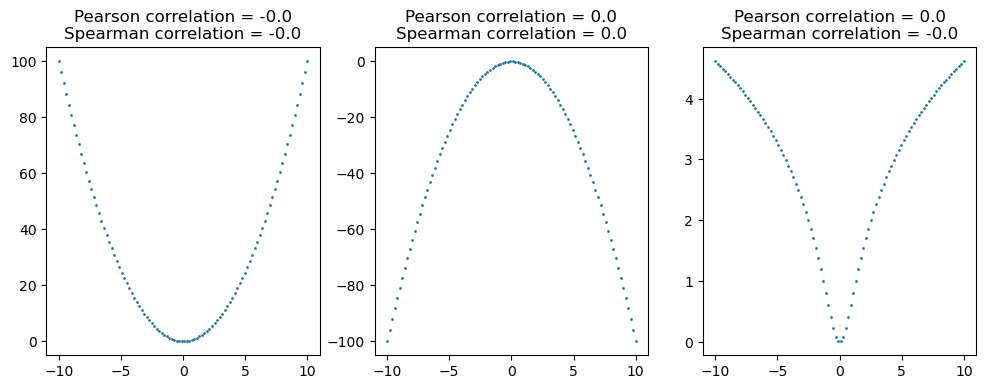

In [14]:
## Код тут 

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y1, s=1)
plt.title(f'Pearson correlation = {round(pearsonr(x, y1)[0], 2)}\nSpearman correlation = {round(spearmanr(x, y1)[0], 2)}')

plt.subplot(1, 3, 2)
plt.scatter(x, y2, s=1)
plt.title(f'Pearson correlation = {round(pearsonr(x, y2)[0], 2)}\nSpearman correlation = {round(spearmanr(x, y2)[0], 2)}')

plt.subplot(1, 3, 3)
plt.scatter(x, y3, s=1)
plt.title(f'Pearson correlation = {round(pearsonr(x, y3)[0], 2)}\nSpearman correlation = {round(spearmanr(x, y3)[0], 2)}')

plt.show()

In [15]:
# y = (y1, y2, y3)

# for i in range(3):
#     plt.figure(figsize=(12, 4))
#     plt.subplot(1, 3, i+1)
#     plt.scatter(x, y[i], s=1)
#     plt.title(f'Pearson correlation = {round(pearsonr(x, y[i])[0], 2)}\nSpearman correlation = {round(spearmanr(x, y[i])[0], 2)}')
#     plt.show()

Потому что взаимосвязь переменных x-y1, x-y2, x-y3 нелинейна. 

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [16]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

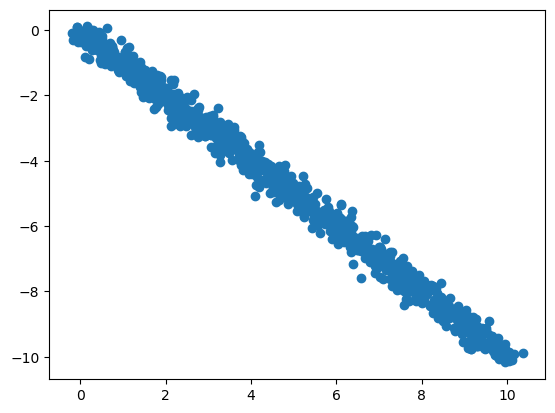

In [17]:
## Код тут

plt.scatter(x, y)
plt.show()

In [18]:
round(pearsonr(x, y)[0], 2)

-1.0

In [19]:
round(spearmanr(x, y)[0], 2)

-1.0

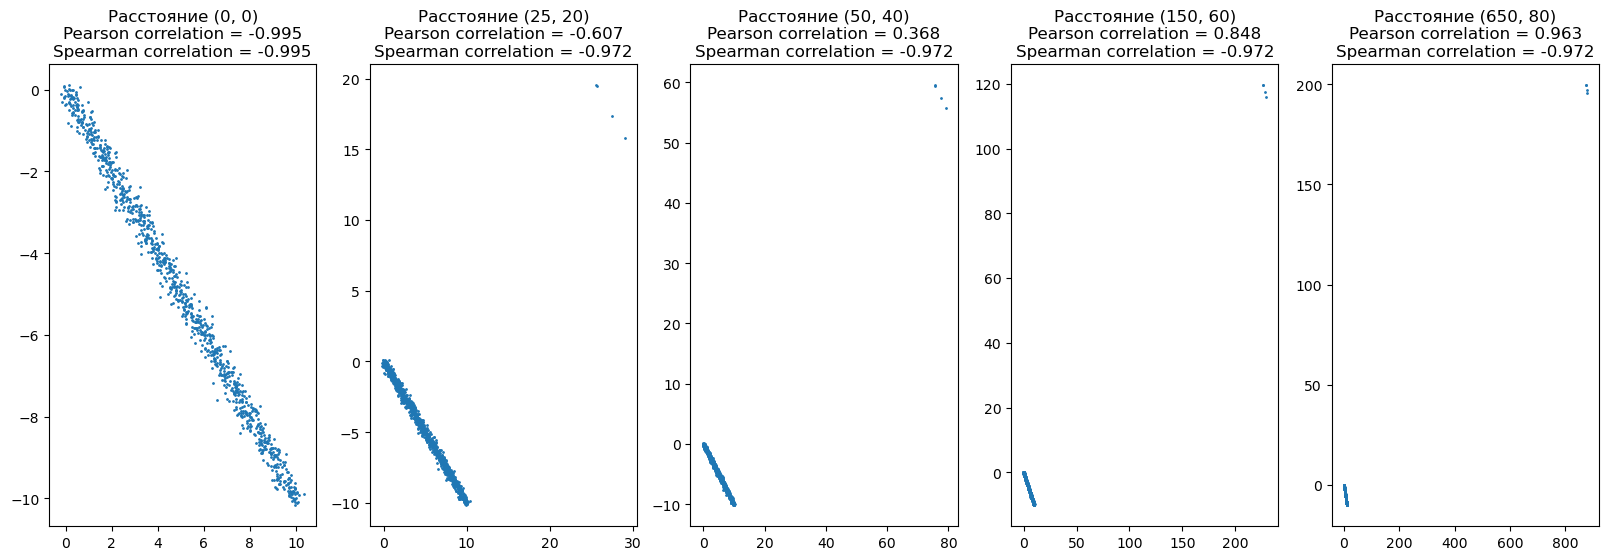

In [20]:
x_delta = [0, 25, 50, 150, 650]
y_delta = [0, 20, 40, 60, 80]

idx = np.random.randint(0, 1000, 4)

fig, ax = plt.subplots(1, len(x_delta), figsize=(20, 6))

for i in range(len(x_delta)):
    x[idx] += x_delta[i]
    y[idx] += y_delta[i]
    ax[i].scatter(x, y, s=1)
    ax[i].title.set_text(f'Расстояние ({x_delta[i]}, {y_delta[i]})\nPearson correlation = {round(pearsonr(x, y)[0], 3)}\nSpearman correlation = {round(spearmanr(x, y)[0], 3)}')
    
plt.show()

Вывод: корреляция Спирмена больше устойчива к выбросам. 